# Visualizing Iceberg Data

## Importing useful packages. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## Loading training Data & Separating into icebergs and ships.

In [2]:
train = pd.read_json('./TrainData/data/processed/train.json')
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [3]:
icebergs = train[train.is_iceberg == 1].sample(n=9, random_state=123)
ships = train[train.is_iceberg==0].sample(n=9, random_state=456)

## Raw image from any id location

In [4]:
img_id = 0
print(train['is_iceberg'][0:10])

0    0
1    0
2    1
3    0
4    0
5    1
6    1
7    0
8    0
9    0
Name: is_iceberg, dtype: int64


NameError: name 'imd_id' is not defined

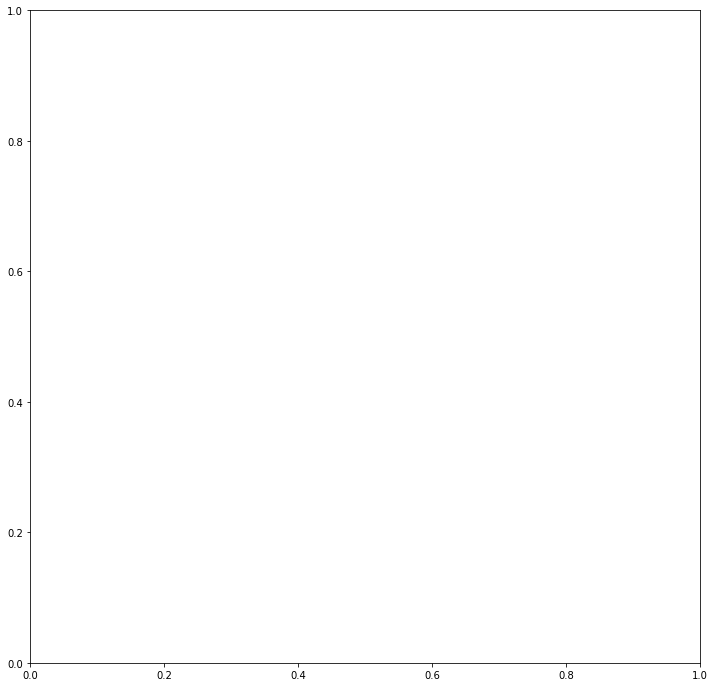

In [5]:
fig = plt.figure(1,figsize=(12,12))
ax = fig.add_subplot(1,1,1)
arr = np.reshape(np.array(train.iloc[imd_id,0]),(75,75))
ax.imshow(arr, cmap='inferno')
plt.show()

## Raw Images of Icebers in band 1

In [ ]:
#Plotting 1st band
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,0]),(75,75))
    ax.imshow(arr, cmap='inferno')
plt.show()

## Showing ships in band 1.


In [ ]:
#Plotting 1st band
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,0]),(75,75))
    ax.imshow(arr, cmap='inferno')
plt.show()

## Showing ships vs icebergs side to side on each band w/ rgb implementation.

In [ ]:
scaler = preprocessing.MinMaxScaler()
fig = plt.figure(1,figsize=(18,16))
ex = 0
#Ships
ax = fig.add_subplot(3,3,1)
arr = np.reshape(np.array(ships.iloc[ex,0]),(75,75))
ax.set_title('Ship Band 1')
ax.imshow(arr, cmap='inferno')
ax = fig.add_subplot(3,3,2)
arr = np.reshape(np.array(ships.iloc[ex,1]),(75,75))
ax.set_title('Ship Band 2')
ax.imshow(arr, cmap='inferno')

#Ship RGB
r = np.array(ships.iloc[ex,0])
g = np.array(ships.iloc[ex,1])
b = [r[x]/g[x] for x in range(len(r))]
rgb = np.array([[r[x],g[x],b[x]]for x in range(len(r))])
rgb = scaler.fit_transform(rgb)
rgb = np.reshape(rgb,(75,75,3))
ax = fig.add_subplot(3,3,3)
ax.set_title('Ship Color Composite')
ax.imshow(rgb)

#Icebergs
ax = fig.add_subplot(3,3,4)
arr = np.reshape(np.array(icebergs.iloc[ex,0]),(75,75))
ax.set_title('Iceberg Band 1')
ax.imshow(arr, cmap='inferno')
ax = fig.add_subplot(3,3,5)
arr = np.reshape(np.array(icebergs.iloc[ex,1]),(75,75))
ax.set_title('Iceberg Band 2')
ax.imshow(arr, cmap='inferno')

#Icebergs RGB
r = np.array(icebergs.iloc[ex,0])
g = np.array(icebergs.iloc[ex,1])
b = [r[x]/g[x] for x in range(len(r))]
rgb = np.array([[r[x],g[x],b[x]]for x in range(len(r))])
rgb = scaler.fit_transform(rgb)
rgb = np.reshape(rgb,(75,75,3))
ax = fig.add_subplot(3,3,6)
ax.set_title('Iceberg Color Composite')
ax.imshow(rgb)
plt.show()

## RGB with HV assigned to red and gree and HH to blue

In [ ]:
scaler = preprocessing.MinMaxScaler()
fig = plt.figure(1,figsize=(18,16))
ex = 0
#Ships
ax = fig.add_subplot(3,3,1)
arr = np.reshape(np.array(ships.iloc[ex,0]),(75,75))
ax.set_title('Ship Band 1')
ax.imshow(arr, cmap='inferno')
ax = fig.add_subplot(3,3,2)
arr = np.reshape(np.array(ships.iloc[ex,1]),(75,75))
ax.set_title('Ship Band 2')
ax.imshow(arr, cmap='inferno')

#Ship RGB
r = np.array(ships.iloc[ex,0])
g = np.array(ships.iloc[ex,0])
b = np.array(ships.iloc[ex,1])
rgb = np.array([[r[x],g[x],b[x]]for x in range(len(r))])
rgb = scaler.fit_transform(rgb)
rgb = np.reshape(rgb,(75,75,3))
ax = fig.add_subplot(3,3,3)
ax.set_title('Ship Color Composite')
ax.imshow(rgb)

#Icebergs
ax = fig.add_subplot(3,3,4)
arr = np.reshape(np.array(icebergs.iloc[ex,0]),(75,75))
ax.set_title('Iceberg Band 1')
ax.imshow(arr, cmap='inferno')
ax = fig.add_subplot(3,3,5)
arr = np.reshape(np.array(icebergs.iloc[ex,1]),(75,75))
ax.set_title('Iceberg Band 2')
ax.imshow(arr, cmap='inferno')

#Icebergs RGB
r = np.array(icebergs.iloc[ex,0])
g = np.array(icebergs.iloc[ex,0])
b = np.array(icebergs.iloc[ex,1])
rgb = np.array([[r[x],g[x],b[x]]for x in range(len(r))])
rgb = scaler.fit_transform(rgb)
rgb = np.reshape(rgb,(75,75,3))
ax = fig.add_subplot(3,3,6)
ax.set_title('Iceberg Color Composite')
ax.imshow(rgb)
plt.show()
print(ships.iloc[ex,3], icebergs.iloc[ex,3])